Making MySQL Connection and Fetching the data From MySQL into VS Code

In [5]:
import mysql.connector
import pandas as pd

# MySQL connection parameters
db_config = {
    'user': 'root',         # Your MySQL username
    'password': 'RamanaG@253126',  # Your MySQL password
    'host': 'localhost',    # Assuming MySQL is running locally
    'database': 'pace'      # The database you created
}

try:
    # Establish connection
    conn = mysql.connector.connect(**db_config)
    cursor = conn.cursor()

    # Fetch data from the table
    cursor.execute("SELECT * FROM PACE_Observations")
    
    # Get all rows from the table
    rows = cursor.fetchall()

    # Get column names from the cursor description
    columns = [desc[0] for desc in cursor.description]
    
    # Load data into a Pandas DataFrame
    df = pd.DataFrame(rows, columns=columns)
    print("Data fetched successfully:")
    print(df.head())  # Print first few rows for sanity check

except mysql.connector.Error as e:
    print(f"Error connecting to MySQL: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print("MySQL connection closed.")


Data fetched successfully:
   id  plankton_density  sea_surface_temperature  salinity  location_id  \
0   1              52.5                     28.4      35.7            1   
1   2              48.9                     27.3      33.8            2   
2   3              54.1                     25.6      36.9            3   
3   4              45.2                     30.2      34.3            4   
4   5              50.7                     29.1      34.0            5   

  observation_notes collection_date  
0              None            None  
1              None            None  
2              None            None  
3              None            None  
4              None            None  
MySQL connection closed.


Printing the data which was fetched from Database

In [6]:
df

,id,plankton_density,sea_surface_temperature,salinity,location_id,observation_notes,collection_date
0,1,52.5,28.4,35.7,1,None,None
1,2,48.9,27.3,33.8,2,None,None
2,3,54.1,25.6,36.9,3,None,None
3,4,45.2,30.2,34.3,4,None,None
4,5,50.7,29.1,34.0,5,None,None
...,...,...,...,...,...,...,...
195,196,50.1,28.9,36.7,96,Calibration needed,2023-04-06
196,197,45.4,29.3,33.9,97,Clear day,2023-04-07
197,198,52.6,30.2,35.1,98,Cloudy conditions,2023-04-08
198,199,47.5,26.8,34.5,99,High plankton activity,2023-04-09


Finding the missing values in the dataset and filling those with mean value

In [7]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing values in the 'plankton_density' and 'sea_surface_temperature' columns with the mean
df['plankton_density'].fillna(df['plankton_density'].mean(), inplace=True)
df['sea_surface_temperature'].fillna(df['sea_surface_temperature'].mean(), inplace=True)

print("Data after filling missing values:\n", df.head())


Missing values:
 id                           0
plankton_density             0
sea_surface_temperature      0
salinity                     0
location_id                  0
observation_notes          100
collection_date            100
dtype: int64
Data after filling missing values:
    id  plankton_density  sea_surface_temperature  salinity  location_id  \
0   1              52.5                     28.4      35.7            1   
1   2              48.9                     27.3      33.8            2   
2   3              54.1                     25.6      36.9            3   
3   4              45.2                     30.2      34.3            4   
4   5              50.7                     29.1      34.0            5   

  observation_notes collection_date  
0              None            None  
1              None            None  
2              None            None  
3              None            None  
4              None            None  


C:\Users\pc\AppData\Local\Temp\ipykernel_12028\1627410369.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['plankton_density'].fillna(df['plankton_density'].mean(), inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_12028\1627410369.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [8]:
# Fill missing values in 'observation_notes' with 'No Observation'
df['observation_notes'].fillna('No Observation', inplace=True)

# Fill missing values in 'collection_date' with the most frequent value (mode)
#df['collection_date'].fillna(df['collection_date'].mode()[0], inplace=True)

# Alternatively, fill with a specific placeholder date (e.g., '1900-01-01')
df['collection_date'].fillna(pd.to_datetime('2024-05-01'), inplace=True)

print("Data after filling missing values in 'observation_notes' and 'collection_date':\n", df.head())


Data after filling missing values in 'observation_notes' and 'collection_date':
    id  plankton_density  sea_surface_temperature  salinity  location_id  \
0   1              52.5                     28.4      35.7            1   
1   2              48.9                     27.3      33.8            2   
2   3              54.1                     25.6      36.9            3   
3   4              45.2                     30.2      34.3            4   
4   5              50.7                     29.1      34.0            5   

  observation_notes      collection_date  
0    No Observation  2024-05-01 00:00:00  
1    No Observation  2024-05-01 00:00:00  
2    No Observation  2024-05-01 00:00:00  
3    No Observation  2024-05-01 00:00:00  
4    No Observation  2024-05-01 00:00:00  


C:\Users\pc\AppData\Local\Temp\ipykernel_12028\3970550682.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['observation_notes'].fillna('No Observation', inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_12028\3970550682.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Checking whether the data preprocessing is done or not

In [9]:
df.isnull().sum()

id                         0
plankton_density           0
sea_surface_temperature    0
salinity                   0
location_id                0
observation_notes          0
collection_date            0
dtype: int64

Handling Outliers using InterQuartile Range Method and printing the data after outlier removal

In [10]:
# Remove outliers from the 'sea_surface_temperature' column
Q1 = df['sea_surface_temperature'].quantile(0.25)
Q3 = df['sea_surface_temperature'].quantile(0.75)
IQR = Q3 - Q1

# Filter data to remove outliers
df_filtered = df[~((df['sea_surface_temperature'] < (Q1 - 1.5 * IQR)) | (df['sea_surface_temperature'] > (Q3 + 1.5 * IQR)))]
print("Data after outlier removal:\n", df_filtered.head())


Data after outlier removal:
    id  plankton_density  sea_surface_temperature  salinity  location_id  \
0   1              52.5                     28.4      35.7            1   
1   2              48.9                     27.3      33.8            2   
2   3              54.1                     25.6      36.9            3   
3   4              45.2                     30.2      34.3            4   
4   5              50.7                     29.1      34.0            5   

  observation_notes      collection_date  
0    No Observation  2024-05-01 00:00:00  
1    No Observation  2024-05-01 00:00:00  
2    No Observation  2024-05-01 00:00:00  
3    No Observation  2024-05-01 00:00:00  
4    No Observation  2024-05-01 00:00:00  


Test the Data Preprocessing with String Data

In [3]:
high_plankton_count = df['observation_notes'].str.contains('High plankton activity').sum()
print(f"\nNumber of observations with high plankton activity: {high_plankton_count}")



Number of observations with high plankton activity: 8


Handling Exceptions with the New Data

In [11]:
try:
    df['collection_date'] = pd.to_datetime(df['collection_date'], errors='raise')
except ValueError as e:
    print(f"Date conversion error: {e}")
    # Handle the error, maybe fill with a default date or drop the rows
    df['collection_date'].fillna(pd.Timestamp('2025-01-01'), inplace=True)


In [13]:
# Convert 'collection_date' to a MySQL-compatible datetime format
df['collection_date'] = pd.to_datetime(df['collection_date'], errors='coerce')


After Preprocessing the data in VS Code..sending back the data to Database by creating a new table in mysql

In [15]:
import pandas as pd
import mysql.connector

# Assuming df is your preprocessed DataFrame

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="RamanaG@253126",
    database="pace"
)
cursor = conn.cursor()

# SQL query to insert data into the new table
insert_query = """
    INSERT INTO PACE_Observations_Preprocessed 
    (plankton_density, sea_surface_temperature, salinity, location_id, observation_notes, collection_date)
    VALUES (%s, %s, %s, %s, %s, %s)
"""

# Loop through the preprocessed DataFrame and insert each row into MySQL
for index, row in df.iterrows():
    # Convert datetime to string format for MySQL if necessary
    collection_date = row['collection_date'].strftime('%Y-%m-%d %H:%M:%S') if not pd.isnull(row['collection_date']) else None

    cursor.execute(insert_query, (
        row['plankton_density'], 
        row['sea_surface_temperature'], 
        row['salinity'], 
        row['location_id'], 
        row['observation_notes'], 
        collection_date  # This is now properly formatted
    ))

# Commit changes
conn.commit()

print("Preprocessed data has been inserted into MySQL table successfully.")


Preprocessed data has been inserted into MySQL table successfully.


Phase 2 DATA VISUALIZATION

In [16]:
# Save DataFrame to CSV
df.to_csv('final_preprocessed_data.csv', index=False)

print("Data has been successfully saved to 'preprocessed_data.csv'.")


Data has been successfully saved to 'preprocessed_data.csv'.


In [2]:
import pandas as pd
data1 = pd.read_csv("final_preprocessed_data.csv")
data1.head()

,id,plankton_density,sea_surface_temperature,salinity,location_id,observation_notes,collection_date
0,1,52.5,28.4,35.7,1,No Observation,2024-05-01
1,2,48.9,27.3,33.8,2,No Observation,2024-05-01
2,3,54.1,25.6,36.9,3,No Observation,2024-05-01
3,4,45.2,30.2,34.3,4,No Observation,2024-05-01
4,5,50.7,29.1,34.0,5,No Observation,2024-05-01


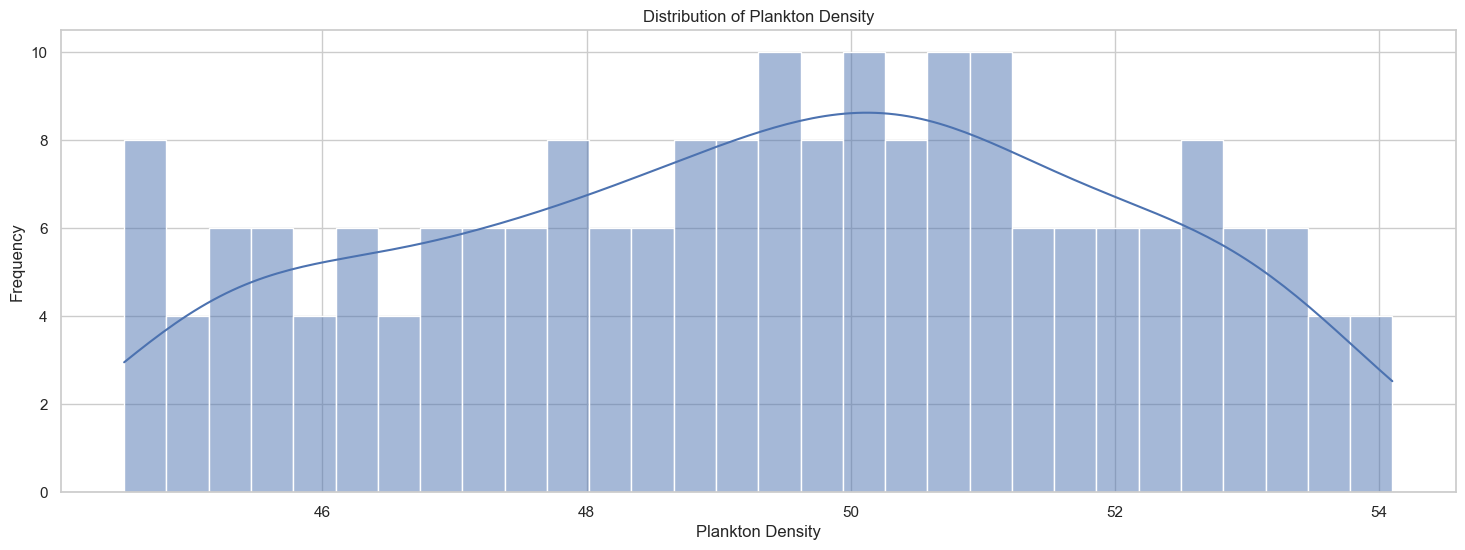

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('final_preprocessed_data.csv')

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Histogram of Plankton Density
plt.figure(figsize=(18, 6))
sns.histplot(data['plankton_density'], bins=30, kde=True)
plt.title('Distribution of Plankton Density')
plt.xlabel('Plankton Density')
plt.ylabel('Frequency')
plt.show()


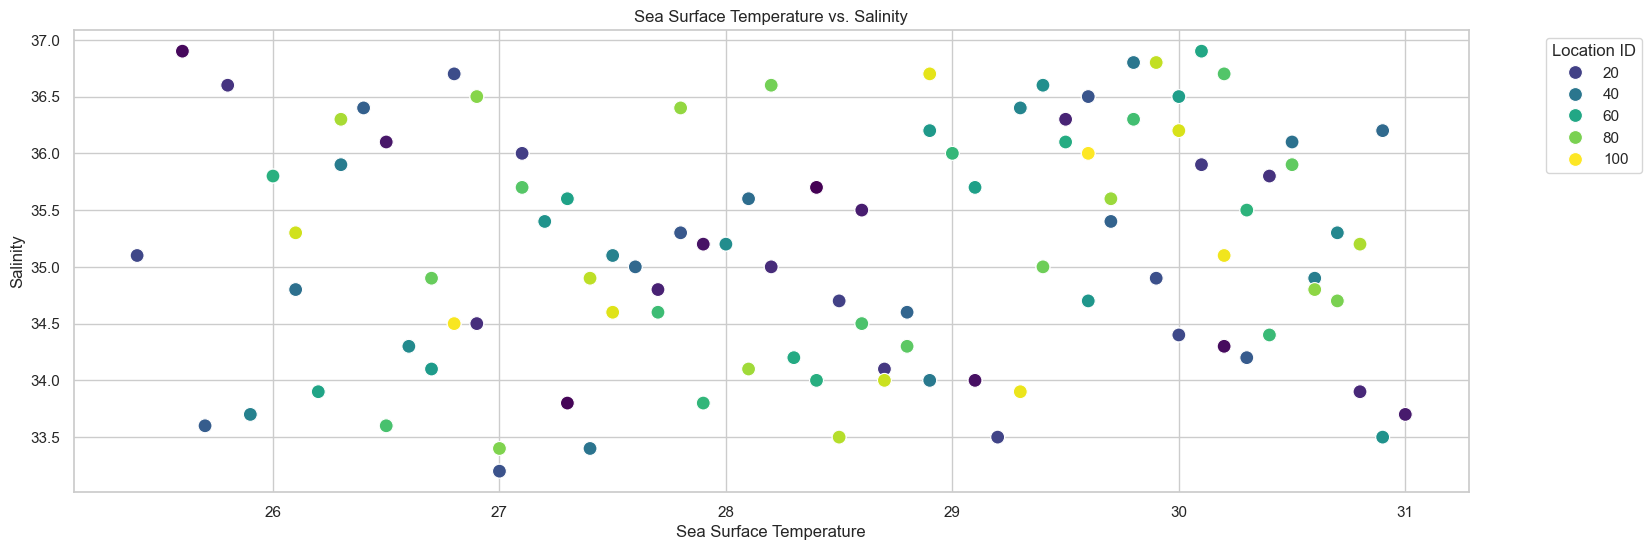

In [17]:
# 2. Scatter Plot of Sea Surface Temperature vs. Salinity
plt.figure(figsize=(18, 6))
sns.scatterplot(data=data, x='sea_surface_temperature', y='salinity', hue='location_id', palette='viridis', s=100)
plt.title('Sea Surface Temperature vs. Salinity')
plt.xlabel('Sea Surface Temperature')
plt.ylabel('Salinity')
plt.legend(title='Location ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

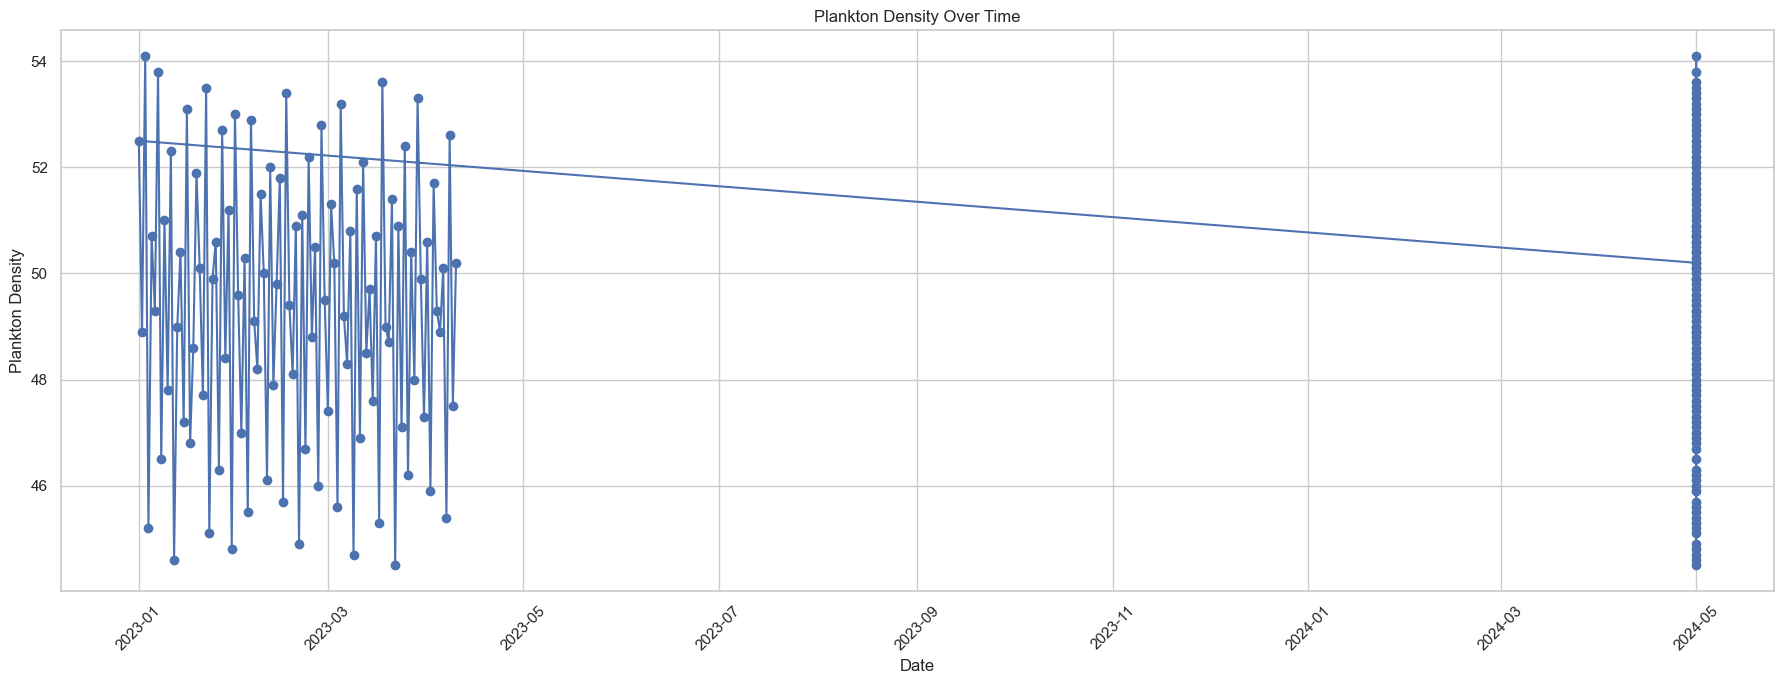

In [16]:
# 3. Time Series Plot of Plankton Density
plt.figure(figsize=(18, 7))
data['collection_date'] = pd.to_datetime(data['collection_date'])
plt.plot(data['collection_date'], data['plankton_density'], marker='o', linestyle='-')
plt.title('Plankton Density Over Time')
plt.xlabel('Date')
plt.ylabel('Plankton Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x1000 with 0 Axes>

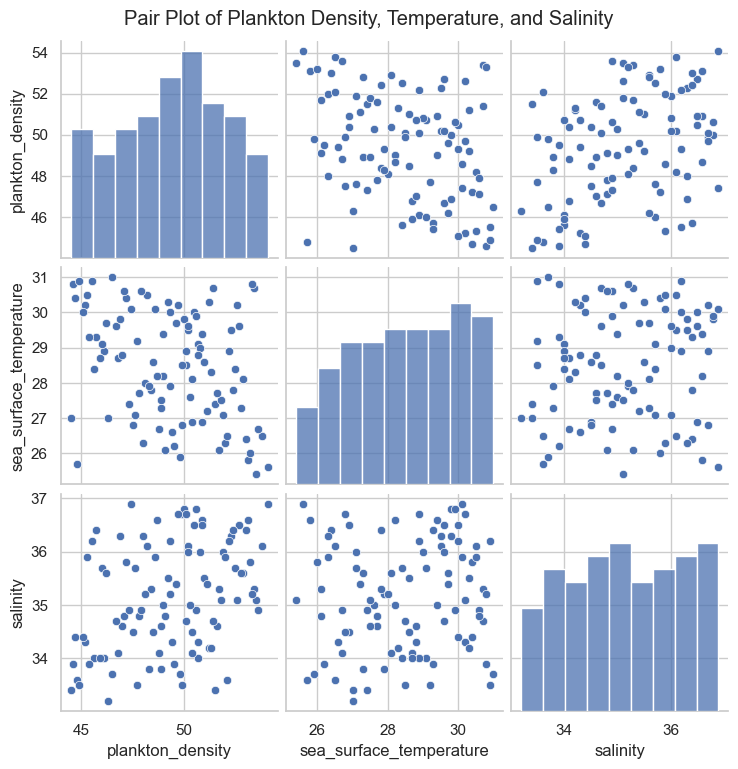

In [11]:
# 4. Pair Plot of Numeric Variables
plt.figure(figsize=(12, 10))
sns.pairplot(data[['plankton_density', 'sea_surface_temperature', 'salinity']])
plt.suptitle('Pair Plot of Plankton Density, Temperature, and Salinity', y=1.02)
plt.show()


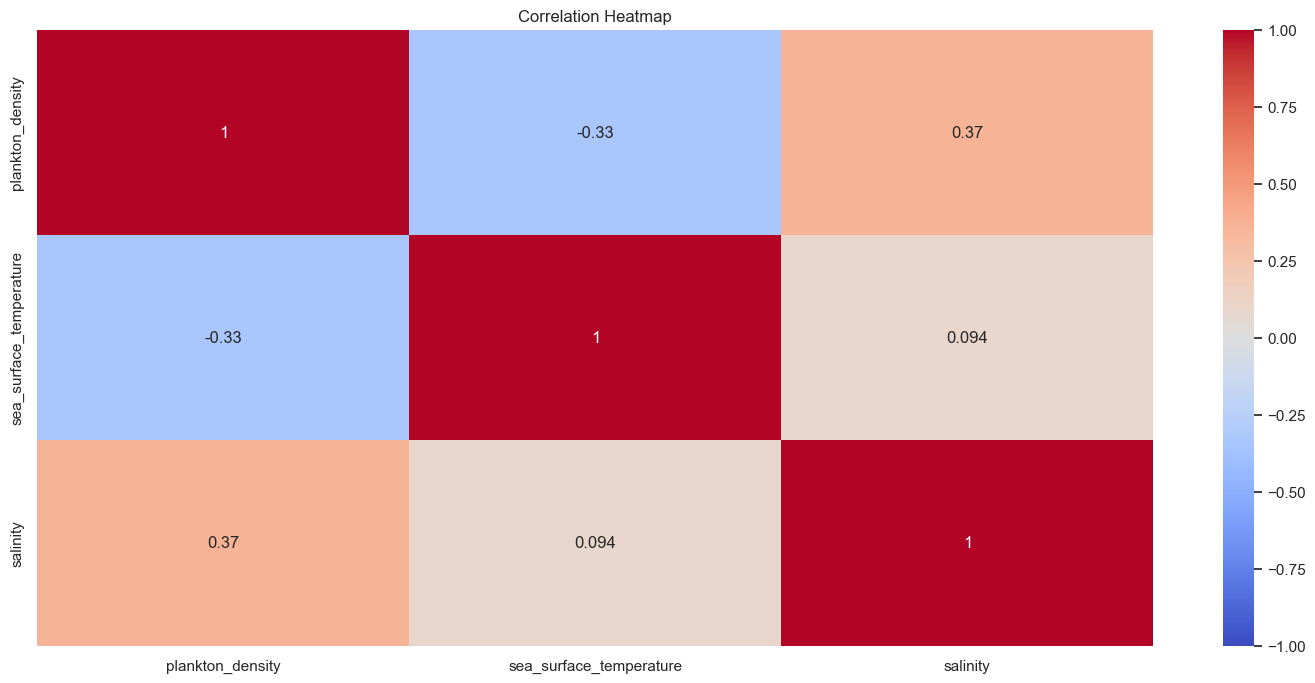

In [13]:
# 6. Heatmap of Correlation Matrix
plt.figure(figsize=(18, 8))
correlation_matrix = data[['plankton_density', 'sea_surface_temperature', 'salinity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_2004\1910552506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='observation_notes', palette='Set2')


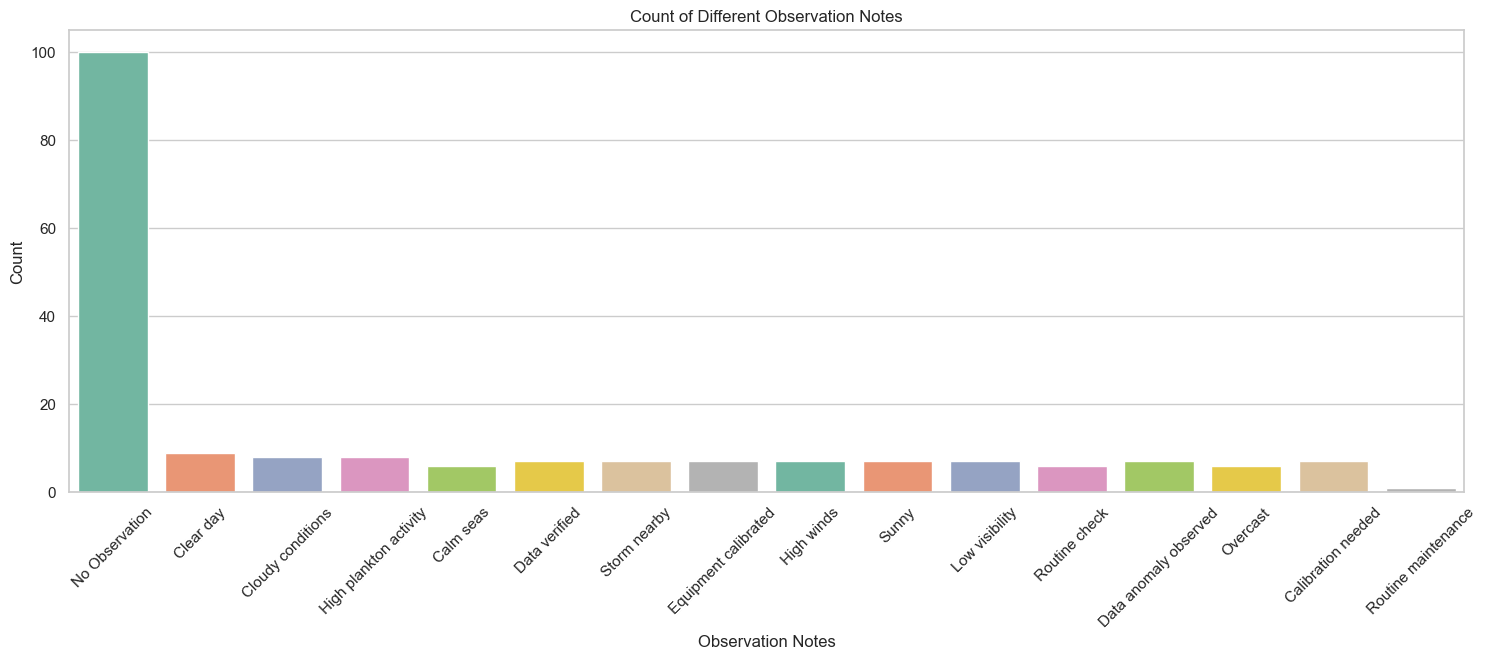

In [15]:
# 6. Count Plot of Observations
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='observation_notes', palette='Set2')
plt.title('Count of Different Observation Notes')
plt.xlabel('Observation Notes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()